In [1]:
library(partykit)
library(party)


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘party’


The following objects are masked from ‘package:partykit’:

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal, varimp




In [7]:
particulate = read.csv("./particulate.csv", header = TRUE, sep = ",")
attach(particulate)
names(particulate)

The following objects are masked from particulate (pos = 3):

    Cases, Commuters, CommutersDensity, Density, ExcedRatio25,
    Exceedances, idIstat, idStudy, itCode, Lat, Long, Population,
    Province, StationsNum, Where




[1] "idStudy"          "idIstat"          "Province"         "itCode"          
 [5] "Exceedances"      "StationsNum"      "Cases"            "Population"      
 [9] "Density"          "Long"             "Lat"              "Where"           
[13] "Commuters"        "CommutersDensity" "ExcedRatio25"

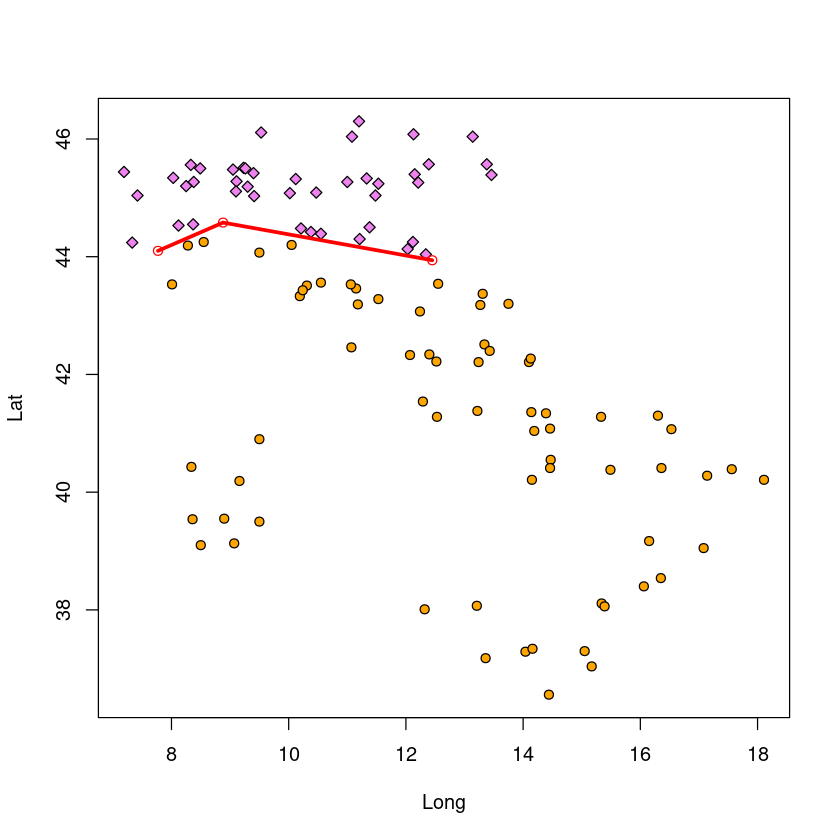

In [8]:
ormea = c(7.77, 44.1)
fraconalto = c(8.88, 44.58)
sanmarino =c(12.45, 43.94)
plot(Long, Lat, col = "white")
points(ormea[1], ormea[2], col = "red")
points(fraconalto[1], fraconalto[2], col = "red")
confineLon = c(ormea[1], fraconalto[1], sanmarino[1])
confineLat = c(ormea[2], fraconalto[2], sanmarino[2])
points(Long[Where == "north"], Lat[Where == "north"], bg = "violet", pch = 23)
points(Long[Where == "south"], Lat[Where == "south"], bg = "orange", pch = 21)
lines(confineLon, confineLat, col = "red", lwd = 3)
points(sanmarino[1], sanmarino[2], col = "red")


In [19]:
### To calculate the ratio of PM10 Exceedances over the StationsNum removing null denominator
ExcedRatioPM10 = Exceedances / StationsNum
ExcedRatioPM10[ExcedRatioPM10 == "NaN"] = 0
summary(ExcedRatioPM10)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.400   2.456   5.586  11.286       3 

In [20]:
### To define the primary outcome of the study, 
### as in Crawley, Chapter 14 'Proportion data' 
### https://onlinelibrary.wiley.com/doi/book/10.1002/9781119941750
response = cbind(Cases, Population - Cases)


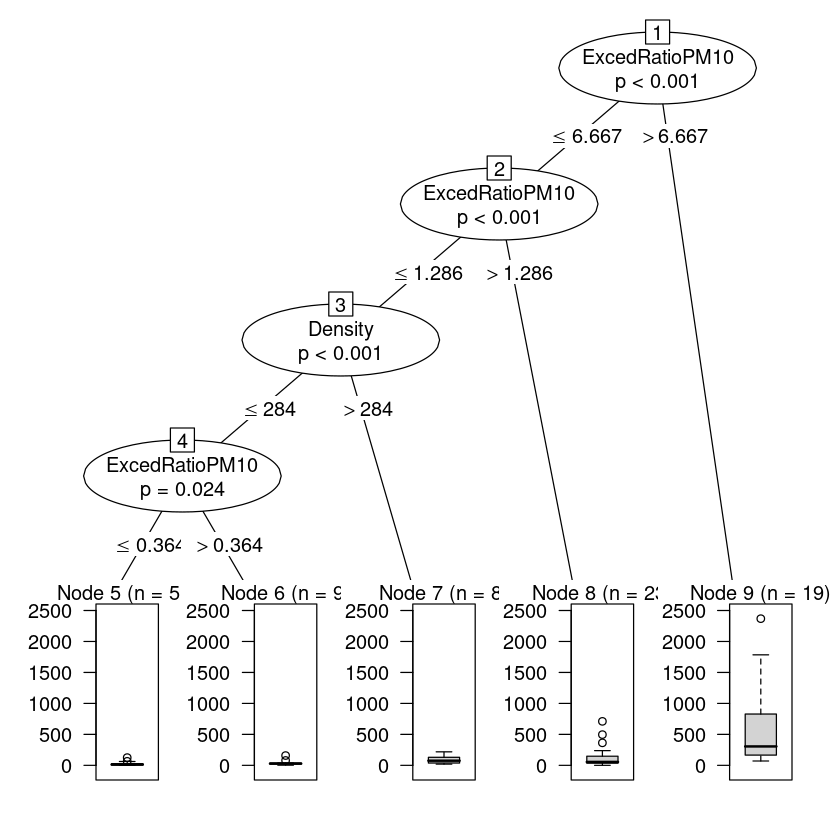

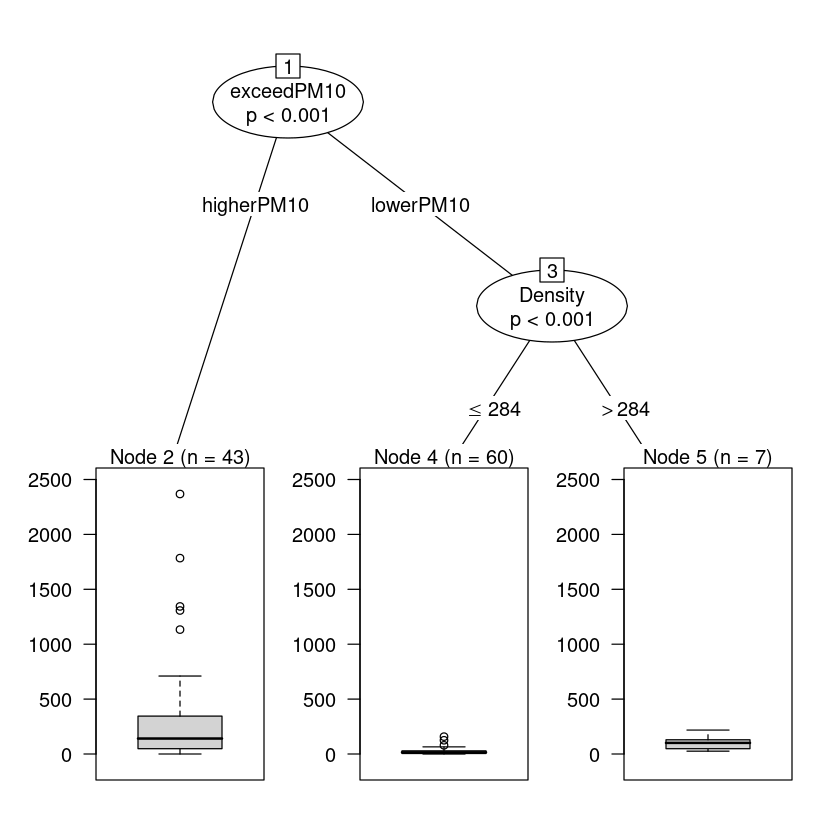

In [22]:
### RESULTS 
### In the univariate analysis, the PM10 daily limit value exceedances appear to be a 
### significant predictor (p < .001) of infection (Fig. 3b) with a 1.29 cut-off value. 
### The cut-off divides the Provinces into two classes, respectively with higher (n = 43) 
### and lower (n = 67) PM10 concentrations. 
### [unpublished]
### the 1.29 cut-off value comes from exploratory analysis:
preliminaryexploration = Cases ~ ExcedRatioPM10 + Density
plot(ctree(preliminaryexploration))
exceedPM10 = factor(ExcedRatioPM10 > 1.285714)
levels(exceedPM10)[2] = "higherPM10"
levels(exceedPM10)[1] = "lowerPM10"
preliminaryexploration2 = Cases ~ exceedPM10 + Density
plot(ctree(preliminaryexploration2))
### [unpublished]
### boxplot appears 'long tailed', log tansform may help in seeing
# il valore 1.29 come e' stato selezionato ? possiamo provare a vedere 
# valori medi o istogrammi

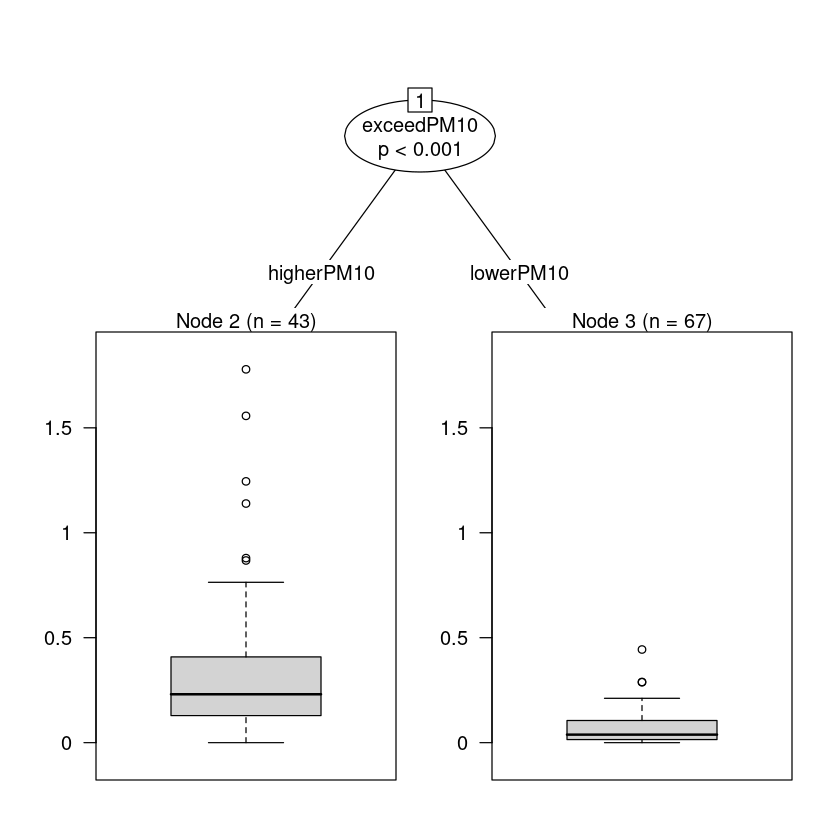

In [23]:
### figure previous3b
CasesProp = 1000 * Cases/Population
LogCasesProp = log(1+ CasesProp)
startrelation = LogCasesProp ~ exceedPM10 
Figure3B = ctree(startrelation)
plot(Figure3B)
### [unpublished figure] 
### same without log transform 
### plot(ctree(CasesProp ~ exceedPM10))


In [24]:
### the less polluted Provinces had a median 0.03 infection case over 1000 residents 
### (first - third quartile 0.01 - 0.09, range 0.00 - 0.56), while most polluted Provinces
### had a median 0.26 infection cases over 1000 Province residents 
### (first - third quartile 0.14 - 0.51, range 0.00 - 4.92).
summary(CasesProp[exceedPM10 == "lowerPM10"])
summary(CasesProp[exceedPM10 == "higherPM10"])


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00000 0.01431 0.03413 0.07435 0.09401 0.55865       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.1377  0.2595  0.6188  0.5056  4.9219       3 